# Probability

* *probability* is a way of quantifying the uncretainty associated with *events* chosen from some *universe* of events (e.g. the die rolls 4)
* *P(E)* means the "probability of the event *E*"

### Dependence and Independence

* roughly speaking, we say that two events *E* and *F* are *dependent* if knowing something about whether *E* happens gives us information about whether *F* happens (and vice versa)
* otherwise, they are *independent*
* mathematically, we say two events are independent if the probability that they bothhappen is the product of the probabilities that each one happens:
    *P(E, F) = P(E)P(F)*

### Conditional Probability 

If two events are not necessarily independent, then we define the probability of *E* "conditional on *F*" as:
* *P(E|F) = P(E,F)/P(F)*

Can think of this as "the probability that E happens, given that we know that F happens"
* *P(E,F) = P(E|F)P(F)

When *E* and *F* are independent, this gives:
* *P(E|F) = P(E)*

### Bayes's Theorem

* a way of "reversing" conditional probabilities
* if we know the probability of some event *E* conditional on some other event *F*, we can use Bayes's Theorem to find out the probability of event *F* conditional on event *E*

Using the definition of conditional probablity twice tells us that:
* *P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)

The event *F* can be split into two mutually exclusive events "*F and E*" and "*F and not E*"
* *P(F) = P(F,E) + P(F, ~E)*

* *P(E|F) = P(F|E)P(E)/[P(F|E)P(E) + P(F| ~E)P( ~E)]*

### Random Variables

* a *random variable* is a variable whose possible values have an associated probability distribution.
* a very simple random variable equals 1 if a coin flip is heads, and 0 if the flip is tails
* a more complicated one might measure the number of heads you observe when flipping a coin 10 times or a value picked from range(10) where each number is equally likely

* the *expected value* of a random variable is the average of its values weighted by their probabilities.
* the coin flip variable has an expected value of 1/2 (=0 * 1/2 + 1 * 1/2) and the range(10) variable has an expected value of 4.5

* random variables can be *conditioned* on events

### Continuous Distributions

* a coin flip corresponds to a *discrete distribution* - one that associates positive probability with discrete events
* a *continuous distribution* corresponds to probability of a continuum (real numbered) outcomes

* the *uniform distribution* put equal weight on all the numbrs between 0 and 1
* because there are infinite numbers between 0 and 1, this necessitates that individual points have a weight of 0
* for this reason, we represent a continuous distribution with a *probability density function* (PDF)

The density function for the uniform distribution is just:

In [1]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

The probability that a random variable following this distribution is between 0.2 and 0.3, is 1/10

The *cumulative distribution function* gives the probability a random variable is less than or equal to a certain value:

In [2]:
def uniform_cdf(x: float) -> float:
    """ Returns the probability that a uniform random variable is <= x """
    if x < 0: return 0   #uniform random is never less than 0
    elif x < 1: return x # e.g. P(x <= 0.4) = 0.4
    else: return 1       # uniform random is always less than 1

### The Normal Distribution

bell-shaped curve determined by two parameters:
* its mean $\mu$ (mu)
* its standard deviation $\sigma$ (sigma)

It has the PDF:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)$$

which we can implement as:

In [3]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float =    0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

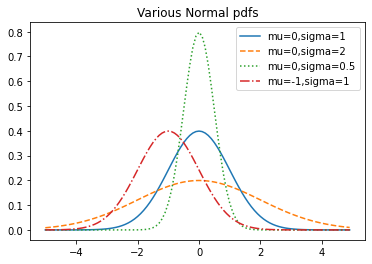

In [5]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x, mu=-1)   for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When $\mu$ = 0 and $\sigma$ = 1, its called the *standard normal distribution*

The CDF for the normal distribution requires using Python's **math.erf** error function

In [6]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

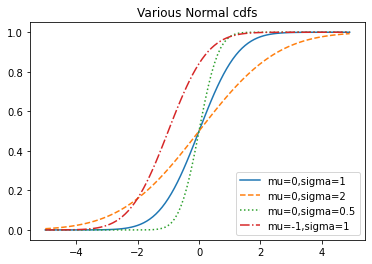

In [7]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x, mu=-1)   for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Sometimes we'll need to invert **normal_cdf** to find the value corresponding to a specified probability. There's no simple way to do this, but **normal_cdf** is continuous and strictly increasing, so we can use a *binary search*:

In [8]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """ Find approximate inverse using binary search """
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0                    # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0                      # normal_cdf(10) is  (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2   # consider the midpoint
        mid_p = normal_cdf(mid_z)    # and the CDF's value there
        if mid_p <p:
            low_z = mid_z            # midpoint too low, search above it
        else:
            hi_z = mid_z             # midpoint too high, search below it
                
    return mid_z

### The Central Limit Theorem

The *central limit theorem* states that a random variable defined as the average of large number of *iid* random variables is itself approximately normally distributed

* in particular, if $x_1, ..., x_n$ are random variables with mean $\mu$ and std dev $\sigma$, and *n* is large, then:

$1/n(x_1 + ... + x_n)$

is approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$

Equivalently:

$$\frac{(x_1 + ... + x_n) - \mu n}{\sigma\sqrt{n}}$$

is approximately normally distributed with mean 0 and standard deviation 1

An easy way to look at this is by looking at *binomial* random variables, which have to parameters *n* and *p*. A Binomial(n,p) random variable is simply the sum of *n* indpendent Bernoulli(*p*) random variables, wach of which equals 1 with probability *p* and 0 with probability 1-p:

In [14]:
import random

def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

In [15]:
def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli(p) variable is *p*, and its std dev is $\sqrt{p(1-p)}$

* the central limit theorem states that as *n* gets large, a Binomial(*n,p*) variable is approximately a normal random variable with mean $\mu = np$ and std dev $\sigma = \sqrt{np(1-p)}$

In [18]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n 
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + --0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

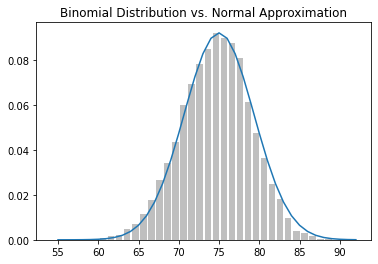

In [19]:
binomial_histogram(0.75, 100, 10000)